In [1]:
import pandas as pd
import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt
from matplotlib.patches import Arrow, Circle

In [ ]:
def getFn(x):
    return Path(x.split('"filename":"')[-1].split('"}}')[0])

df0['full_path'] = df0['subject_data'].apply(getFn)
df0['dataset'] = df0['full_path'].apply(lambda x: x.parent.name)

In [2]:
# read the csv
df0 = pd.read_csv('sorghum-and-maize-segmentation-using-hyperspectral-imagery-classifications.csv')
# extract the data only from Marcin
df1 = df0[df0['user_name'] == 'mgrzybowski']
# or use iloc function to pull out data by indices
df2 = df1.iloc[-19:, :]

In [6]:
# present pixels collected 
def ShowPixel(png, xs, ys, cs, title=''):
    '''
    args:
        png: the image file name uploaded to zooniverse
        xs: the x coordinates of the pixels clicked on the image
        ys: the y coordinates of the pixels clicked 
        cs: the color of each categoryu
    '''
    patches = []
    for x,y,c in zip(xs, ys, cs):
        circle = Circle((x, y), radius=2, color=c)
        patches.append(circle)
    img = io.imread(png)    
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    for p in patches:
        ax.add_patch(p)
    if title:
        ax.set_title(title)
    plt.savefig('check_%s.png'%title, dpi=300)
    plt.show(fig)
    plt.clf()
    print('Done')

In [4]:
colors = {'Green leaf':'green', 'Yellow leaf':'yellow', 'Stalk':'#ff7f00', 'Panicle':'#984ea3', 'Background':'#e41a1c'}

In [9]:
bad_sm = ['449_TX430_N1.png','P850029_338_N1.png','SC85_337_N1.png']

429_ACME_N4.png


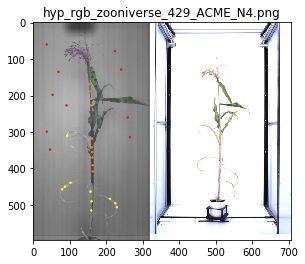

Done


<Figure size 432x288 with 0 Axes>

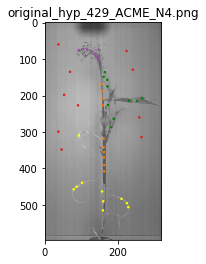

Done
426_SC1439_N4.png


<Figure size 432x288 with 0 Axes>

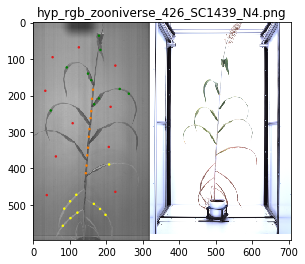

Done


<Figure size 432x288 with 0 Axes>

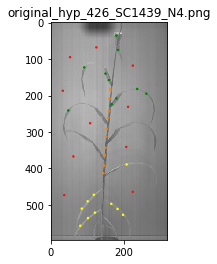

Done
423_90M_N4.png


<Figure size 432x288 with 0 Axes>

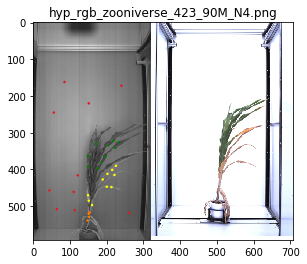

Done


<Figure size 432x288 with 0 Axes>

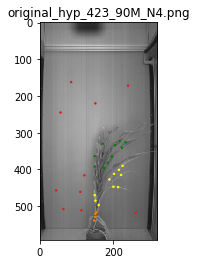

Done
339_P898012_N1.png


<Figure size 432x288 with 0 Axes>

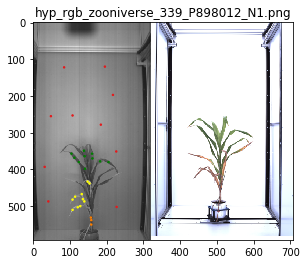

Done


<Figure size 432x288 with 0 Axes>

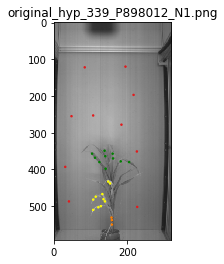

Done
340_ACME_N1.png


<Figure size 432x288 with 0 Axes>

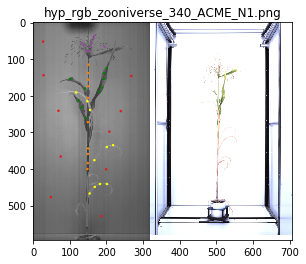

Done


<Figure size 432x288 with 0 Axes>

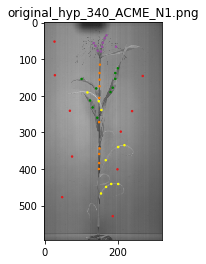

Done
449_TX430_N1.png


<Figure size 432x288 with 0 Axes>

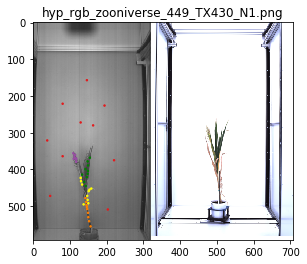

Done


<Figure size 432x288 with 0 Axes>

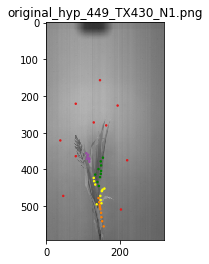

Done
422_SC85_N4.png


<Figure size 432x288 with 0 Axes>

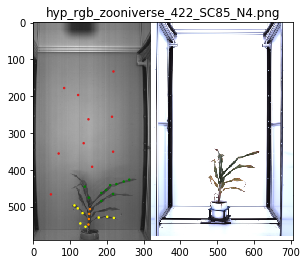

Done


<Figure size 432x288 with 0 Axes>

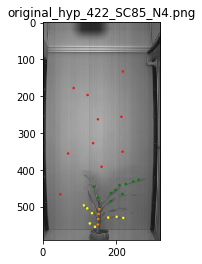

Done
P850029_338_N1.png


<Figure size 432x288 with 0 Axes>

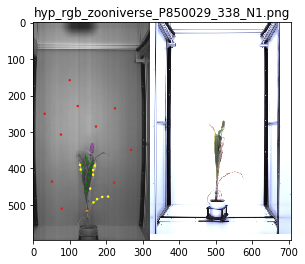

Done


<Figure size 432x288 with 0 Axes>

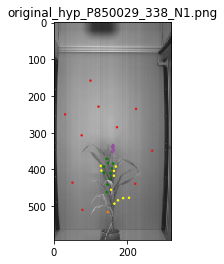

Done
414_SC301_N4.png


<Figure size 432x288 with 0 Axes>

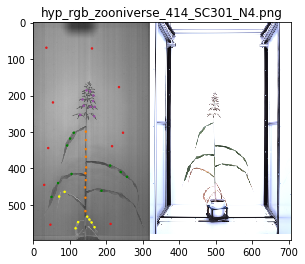

Done


<Figure size 432x288 with 0 Axes>

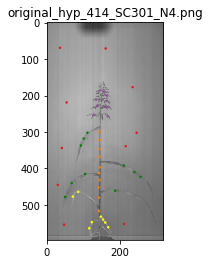

Done
416_P850029_N4.png


<Figure size 432x288 with 0 Axes>

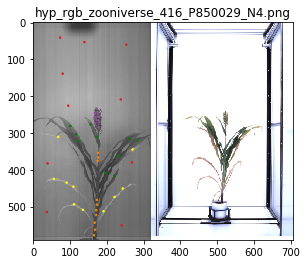

Done


<Figure size 432x288 with 0 Axes>

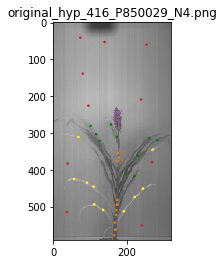

Done
425_P898012_N4.png


<Figure size 432x288 with 0 Axes>

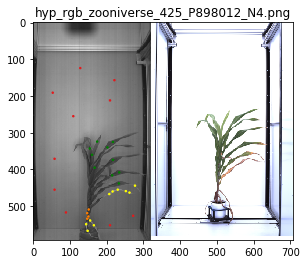

Done


<Figure size 432x288 with 0 Axes>

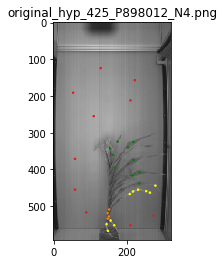

Done
343_SC1439_N1.png


<Figure size 432x288 with 0 Axes>

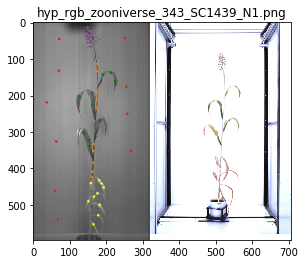

Done


<Figure size 432x288 with 0 Axes>

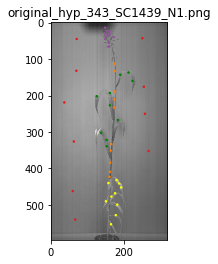

Done
421_BTX3197_N4.png


<Figure size 432x288 with 0 Axes>

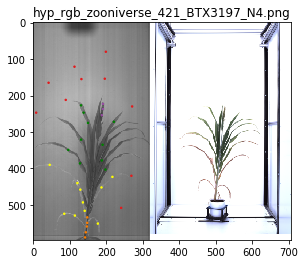

Done


<Figure size 432x288 with 0 Axes>

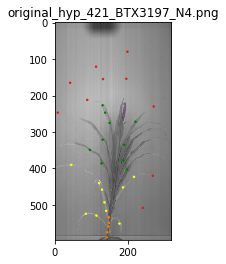

Done
409_SC500_N4.png


<Figure size 432x288 with 0 Axes>

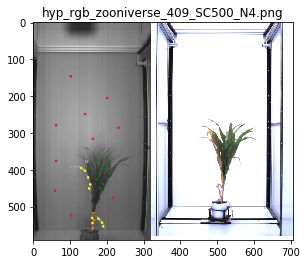

Done


<Figure size 432x288 with 0 Axes>

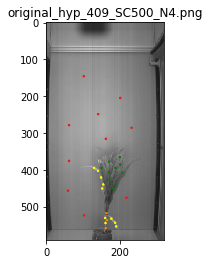

Done
344_SC500_N4.png


<Figure size 432x288 with 0 Axes>

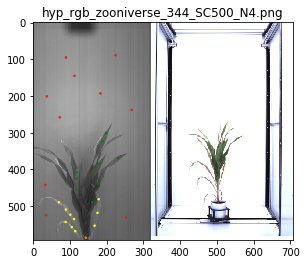

Done


<Figure size 432x288 with 0 Axes>

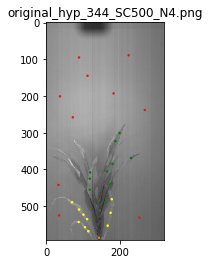

Done
SC85_337_N1.png


<Figure size 432x288 with 0 Axes>

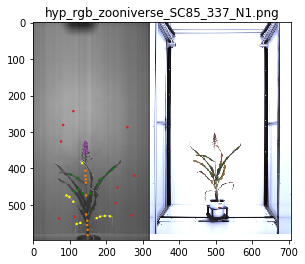

Done


<Figure size 432x288 with 0 Axes>

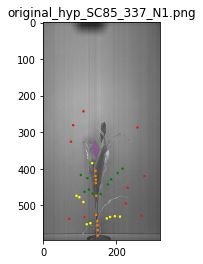

Done
347_90M_N1.png


<Figure size 432x288 with 0 Axes>

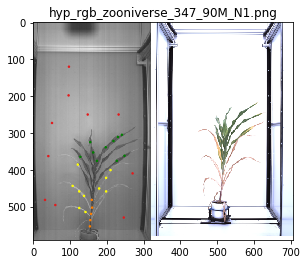

Done


<Figure size 432x288 with 0 Axes>

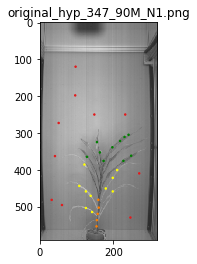

Done
464_TX430_N4.png


<Figure size 432x288 with 0 Axes>

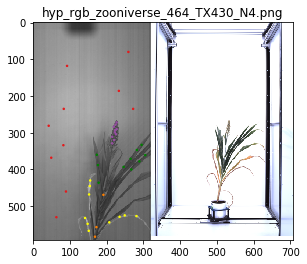

Done


<Figure size 432x288 with 0 Axes>

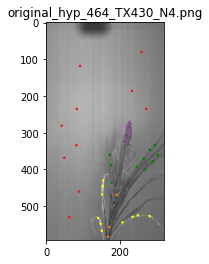

Done
345_SC301_N1.png


<Figure size 432x288 with 0 Axes>

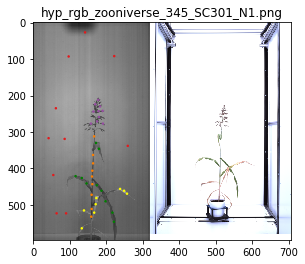

Done


<Figure size 432x288 with 0 Axes>

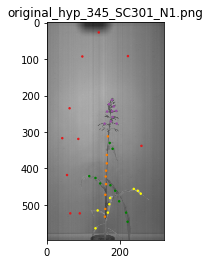

Done


<Figure size 432x288 with 0 Axes>

In [7]:
# this cell used for validation of the pxiel coordinates
for i, j in zip(df2['annotations'], df2['subject_data']):
    fn = j.split('"Filename":"')[-1].split('"}}')[0]
    print(fn)

    xs, ys, cs = [], [], []
    for p in json.loads(i)[0]['value']:
        x, y, label = int(p['x']), int(p['y']), p['tool_label'].rstrip()
        xs.append(x)
        ys.append(y)
        cs.append(colors[label])
    img = '/Users/cmiao/Documents/Projects/MackenzieMarcin/Hype_RGB/%s'%fn
    ShowPixel(img, xs, ys, cs, title = 'hyp_rgb_zooniverse_%s'%fn)
    hyp_fn = '/Users/cmiao/Documents/Projects/MackenzieMarcin/Hype/%s/180_0_0.png'%(fn.split('_N')[0])
    ShowPixel(hyp_fn, xs, ys, cs, title='original_hyp_%s'%fn)
    '''
    if fn not in bad_sm:
        arr = np.read('/Users/cmiao/Documents/Projects/MackenzieMarcin/Hype/%s_arr.npy'%fn.split('_N')[0])
        print(arr.shape)
    '''

In [10]:
# the most important step to extract reflectance of each collected pixel from hyperspectral image cube
fns, labels, reflectance = [], [], []
for i, j in zip(df2['annotations'], df2['subject_data']):
    fn = j.split('"Filename":"')[-1].split('"}}')[0]
    if fn not in bad_sm:
        print(fn)
        xs, ys, cs = [], [], []
        # you need convert the hyperspectral image cube to 3d numpy array first
        arr = np.load('/Users/cmiao/Documents/Projects/MackenzieMarcin/Hype/%s.npy'%fn.split('_N')[0])
        for p in json.loads(i)[0]['value']:
            x, y, label = int(p['x']), int(p['y']), p['tool_label'].rstrip()
            xs.append(x)
            ys.append(y)
            cs.append(colors[label])            
            refs = arr[y, x, :]
            
            fns.append(fn)
            labels.append(label)
            reflectance.append(refs)

429_ACME_N4.png
426_SC1439_N4.png
423_90M_N4.png
339_P898012_N1.png
340_ACME_N1.png
422_SC85_N4.png
414_SC301_N4.png
416_P850029_N4.png
425_P898012_N4.png
343_SC1439_N1.png
421_BTX3197_N4.png
409_SC500_N4.png
344_SC500_N4.png
347_90M_N1.png
464_TX430_N4.png
345_SC301_N1.png


In [11]:
# create dataframe for all reflectance. For example if we have 100 pixels, the shape of this df_reflectance would be 100*243
df_reflectance = pd.DataFrame(reflectance)
# add two more columns (file name and the lable) to the df 
df_reflectance['fn'] = fns
df_reflectance['label'] = labels
df_reflectance.to_csv('signatures.csv', index=False)

In [12]:
df_plot = df_reflectance.drop('fn', axis=1)

In [13]:
colors = {'Green leaf':'#66c2a5', 'Yellow leaf':'#a6d854', 'Stalk':'#fc8d62', 'Panicle':'#e78ac3', 'Background':'#8da0cb'}

In [14]:
df_wave = pd.read_csv('/Users/cmiao/Documents/Projects/TimeSeriesGWAS/Figure_Table/Shared_Info/wavelength.txt', delim_whitespace=True)
waves = df_wave['Wavelength(nm)'].values

Background (160, 243)
Green leaf (160, 243)
Panicle (72, 243)
Stalk (101, 243)
Yellow leaf (154, 243)


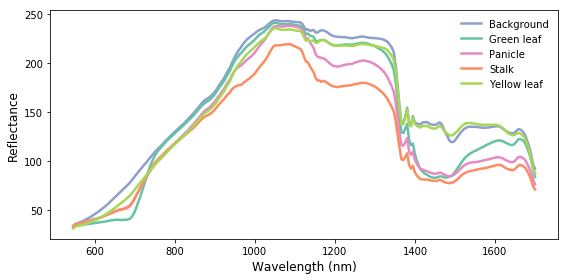

In [252]:
fig, ax = plt.subplots(figsize=(8, 4))
for idx, grp in df_plot.groupby('label'):
    grp = grp.iloc[:, :-1]
    print(idx, grp.shape)
    means, stds = grp.mean().values, grp.std().values
    xs = range(243)
    
    ax.plot(waves, means, c=colors[idx], label=idx, lw=2.5)
ax.legend(frameon=False)
ax.set_xlabel('Wavelength (nm)', fontsize=12)
ax.set_ylabel('Reflectance', fontsize=12)
plt.tight_layout()
plt.savefig('Signature.png', dpi=300)
plt.show()

Background (160, 243)
Green leaf (160, 243)
Panicle (72, 243)
Stalk (101, 243)
Yellow leaf (154, 243)


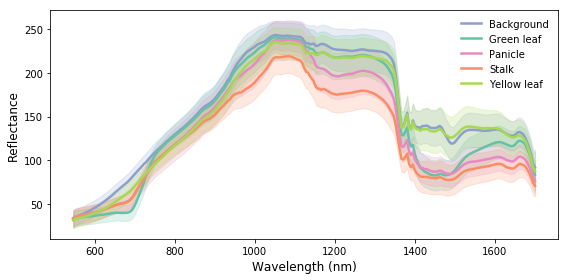

In [256]:
fig, ax = plt.subplots(figsize=(8, 4))
for idx, grp in df_plot.groupby('label'):
    grp = grp.iloc[:, :-1]
    print(idx, grp.shape)
    means, stds = grp.mean().values, grp.std().values
    ax.plot(waves, means, c=colors[idx], label=idx, lw=2.5)
    ax.fill_between(waves, means-stds, means+stds, alpha=0.2, edgecolor=colors[idx], facecolor=colors[idx])
    
    
ax.legend(frameon=False)
ax.set_xlabel('Wavelength (nm)', fontsize=12)
ax.set_ylabel('Reflectance', fontsize=12)
plt.tight_layout()
plt.savefig('Signature_shadow1.png', dpi=300)
plt.show()

Background (160, 243)
Yellow leaf (154, 243)


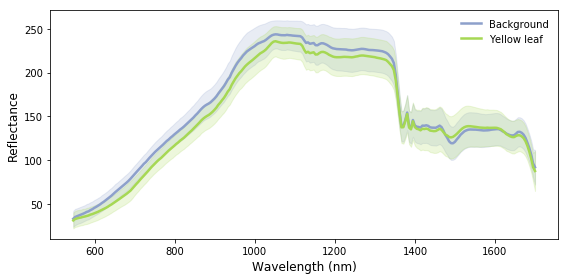

In [15]:
df_plot_leaf = df_plot[(df_plot['label'] == 'Background') | (df_plot['label'] == 'Yellow leaf')]

fig, ax = plt.subplots(figsize=(8, 4))
for idx, grp in df_plot_leaf.groupby('label'):
    
    grp = grp.iloc[:, :-1]
    print(idx, grp.shape)
    means, stds = grp.mean().values, grp.std().values
    ax.plot(waves, means, c=colors[idx], label=idx, lw=2.5)
    ax.fill_between(waves, means-stds, means+stds, alpha=0.2, edgecolor=colors[idx], facecolor=colors[idx])
    
    
ax.legend(frameon=False)
ax.set_xlabel('Wavelength (nm)', fontsize=12)
ax.set_ylabel('Reflectance', fontsize=12)
plt.tight_layout()
plt.savefig('background_senescing_leaf.png', dpi=300)
plt.show()

Green leaf (160, 243)
Yellow leaf (154, 243)


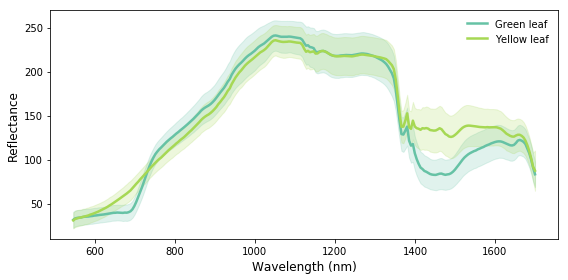

In [264]:
df_plot_leaf = df_plot[(df_plot['label'] == 'Green leaf') | (df_plot['label'] == 'Yellow leaf')]

fig, ax = plt.subplots(figsize=(8, 4))
for idx, grp in df_plot_leaf.groupby('label'):
    
    grp = grp.iloc[:, :-1]
    print(idx, grp.shape)
    means, stds = grp.mean().values, grp.std().values
    ax.plot(waves, means, c=colors[idx], label=idx, lw=2.5)
    ax.fill_between(waves, means-stds, means+stds, alpha=0.2, edgecolor=colors[idx], facecolor=colors[idx])
    
    
ax.legend(frameon=False)
ax.set_xlabel('Wavelength (nm)', fontsize=12)
ax.set_ylabel('Reflectance', fontsize=12)
plt.tight_layout()
plt.savefig('Signature_leaf.png', dpi=300)
plt.show()

In [3]:
df = pd.read_csv('signatures.csv').drop('fn', axis=1)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,234,235,236,237,238,239,240,241,242,label
0,46,46,48,47,47,49,49,50,50,50,...,161,162,156,158,155,147,139,128,116.0,Green leaf
1,46,46,48,48,48,49,49,49,48,48,...,158,158,157,151,150,144,138,127,116.0,Green leaf
2,47,48,46,49,48,49,48,49,49,50,...,143,141,141,136,130,131,126,119,107.0,Green leaf
3,46,47,49,48,48,49,50,50,50,50,...,164,161,162,160,152,147,136,125,113.0,Green leaf
4,43,44,49,46,45,44,46,46,43,46,...,137,139,136,130,129,125,119,109,103.0,Green leaf


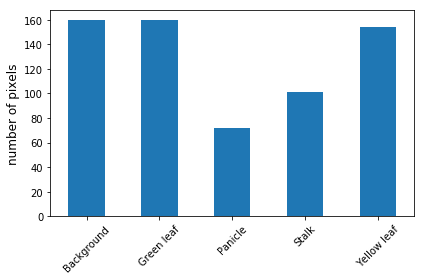

In [19]:
ax = df.groupby('label').count()[['0']].plot.bar()
ax.get_legend().remove()
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('')
ax.set_ylabel('number of pixels', fontsize=12)
plt.tight_layout()
plt.savefig('training_stat.png', dpi=300)
plt.show()